# Predicting heart disease using machine learning

* This a binary classification
* The project is accepted if it has a 95% accuracy

In [2]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score,recall_score, accuracy_score, f1_score, RocCurveDisplay
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, cross_val_score
%matplotlib inline  
#we want our plots to appear inside the notebook, so use the above line

In [3]:
df=pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

## EDA

* What questions are you trying to solve?
* What kind of data do we have and how do we treat different types?
* Whats missing from the data and how do you deal with it?
* Where are the outliers and why should you care about them?
* How can you add, change or remove features to get more out of your data?

In [4]:
df.head()
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#lets find out how many samples in each class
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

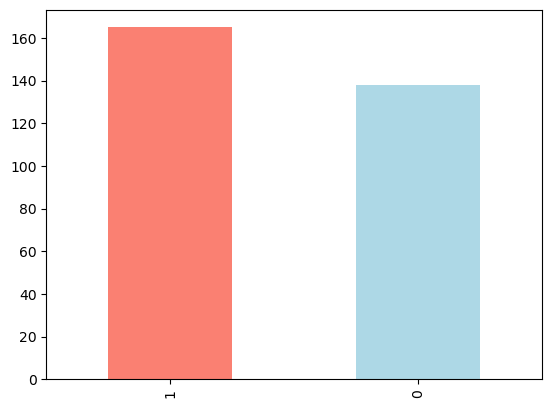

In [6]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
#Heart disease Frequency according to Sex
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
#Compare target with sex
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


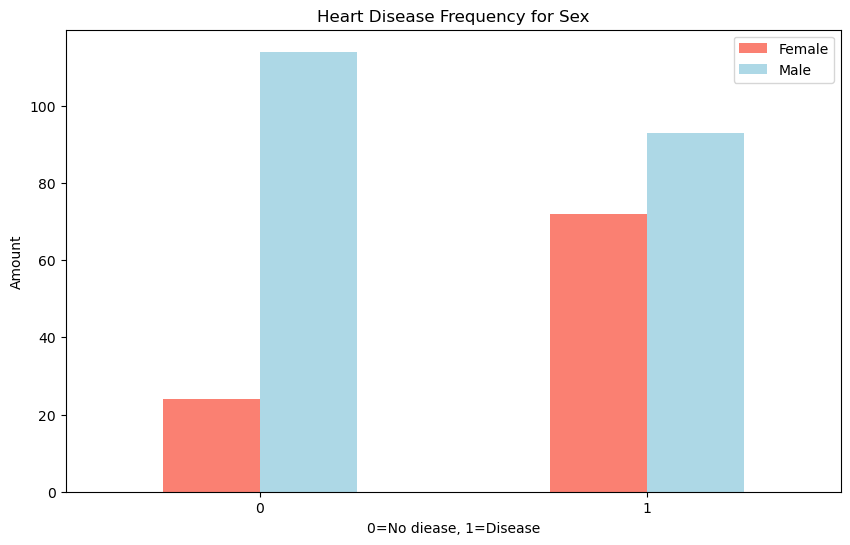

In [11]:
#Create a plot of above crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",figsize=(10,6),color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0=No diease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [12]:
df["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

<Axes: xlabel='target'>

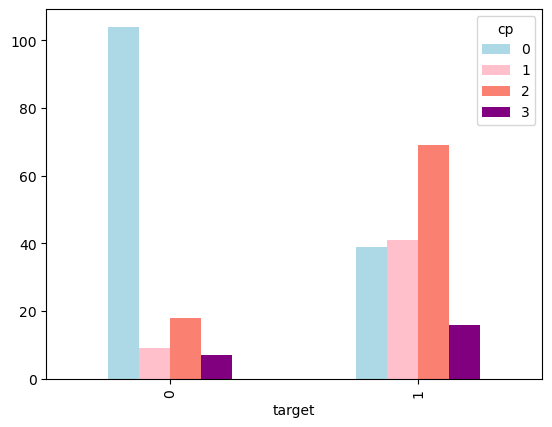

In [13]:
pd.crosstab(df.target,df.cp).plot(kind="bar",color=["lightblue","pink","salmon","purple"])
#OR
#pd.crosstab(df.cp,df.target).plot(kind="bar",color=["lightblue","pink"])
#Usually keep more values on x-axis

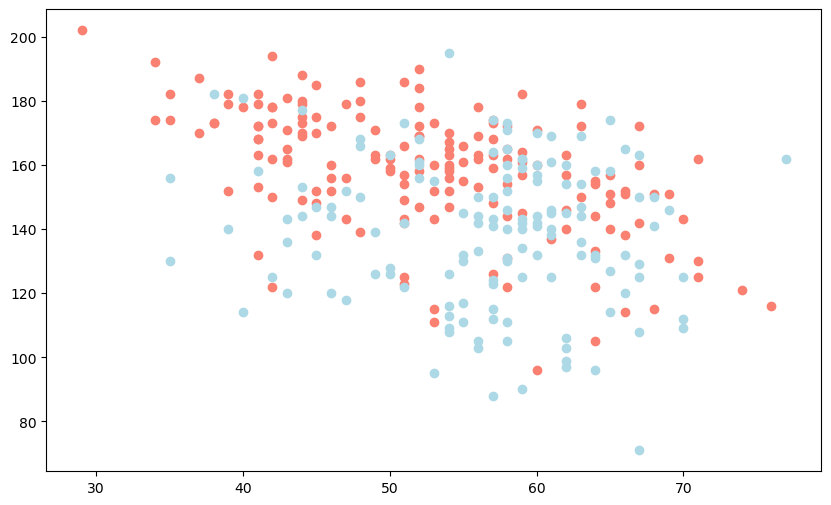

In [14]:
#Comapring different columns
#Age vs Max Heart rate
#Scatter with positive examples
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="salmon")
#From graph, we can infer that the youngest has the highest heart rate

#Scatter with negative examples
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue")

<Axes: ylabel='Frequency'>

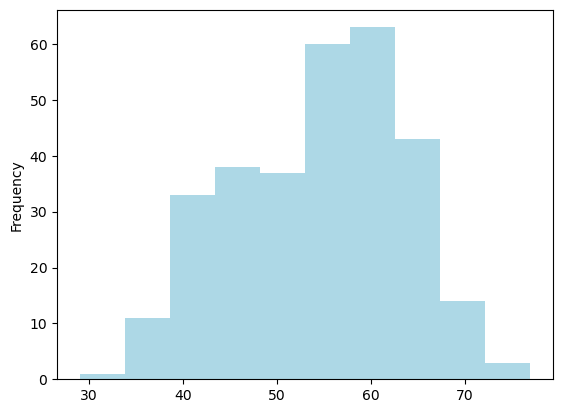

In [15]:
df.age.plot.hist()
#OR
df.age.plot(kind="hist",color="lightblue")

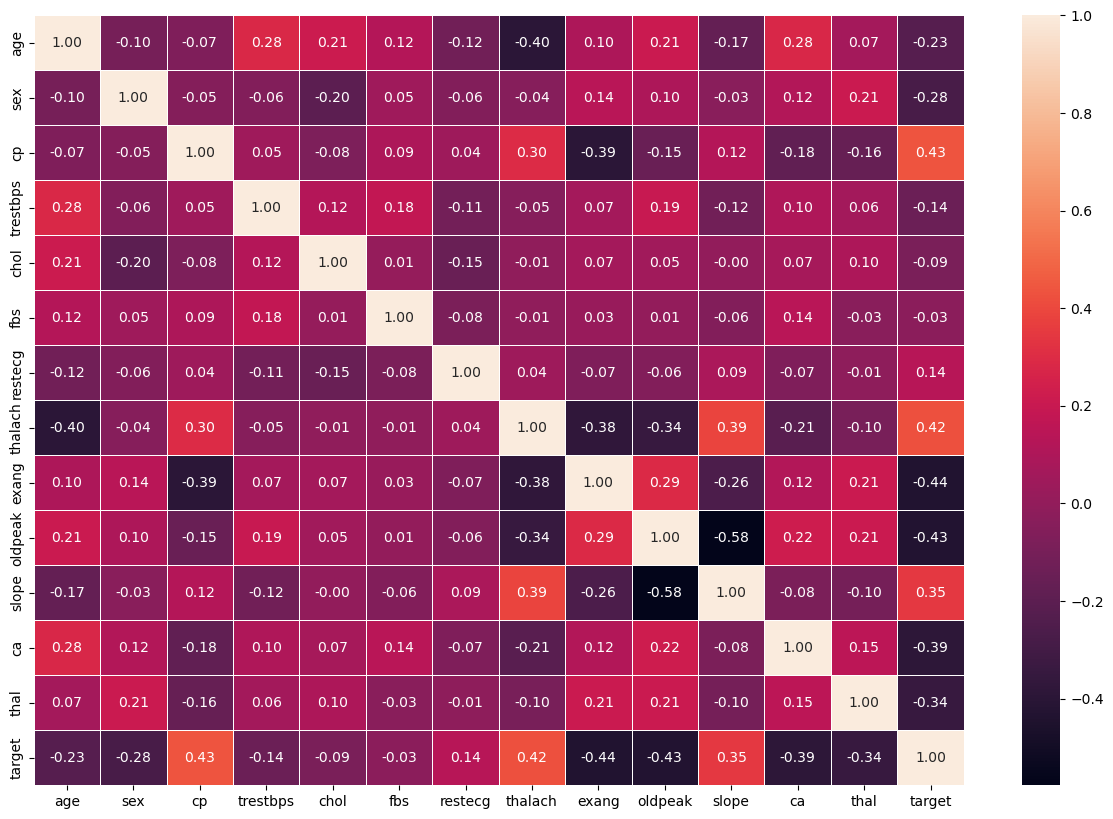

In [18]:
#Building a correlation matrix:
df.corr()
#Visualizing it with the help of heatmap
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f")

# Model building using sckitlearn

In [20]:
x=df.drop("target",axis=1)
y=df["target"]

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
len(x_test)

61

In [22]:
#Put all 3 models in a dictionary
models={"Logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()}

#Create a function to fit and score models
def fit_and_score(models,x_train,x_test,y_train,y_test):
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [23]:
result=fit_and_score(models,x_train,x_test,y_train,y_test)
result

C:\Users\NEERAJA N\Desktop\sample_project1\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.819672131147541,
 'KNN': 0.6557377049180327,
 'Random Forest': 0.8360655737704918}

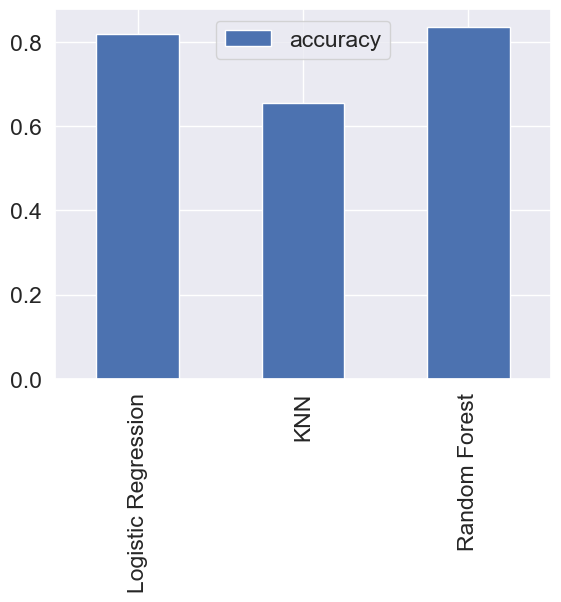

In [25]:
#Visual Model Comparison
model_compare=pd.DataFrame(result,index=["accuracy"])
model_compare.T.plot.bar();

# Evaluate and improve

* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross-validation 
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

First 2 is part of all ML models

Rest all are part of only classification model

## Hyperparameter tuning

### Tuning KNN (BY HAND)

In [26]:
train_scores=[]
test_scores=[]
neighbors=range(1,21)   #parameter which is changed in every iteration
knn=KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))

Maximum KNN score on the test data: 83.61


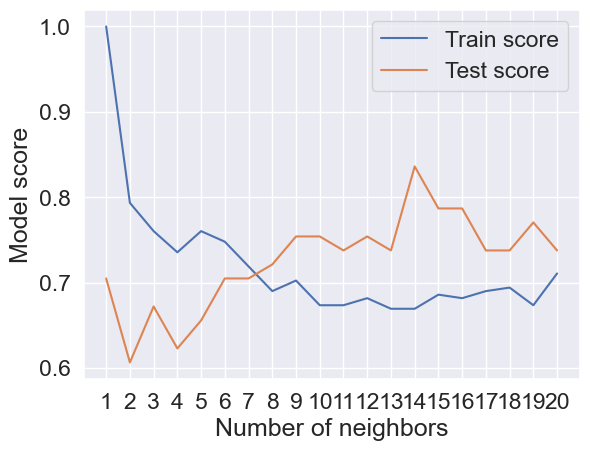

In [27]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}")
#The score is less than LogisticRegression, so ignore KNN

### Hyperparameter tuning using RandomizedSearchCV (cv means cross validation where it creates 5 different versions of training and testing data and finds the best one)

Tuning 
* LogisticRegression
* RandomForestClassifier

In [28]:
#Creating a hyperparameter grid for LogisticRegression
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}

#Creating a hyperparameter grid for RandomForest
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

In [29]:
#For LogisticRegression
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=True)
rs_log_reg.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [30]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [31]:
rs_log_reg.score(x_test,y_test)

0.819672131147541

In [32]:
#RandomForest
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [33]:
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 8,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [34]:
rs_rf.score(x_test,y_test)

0.8360655737704918

#### Eliminate RandomForest

### Hyperparameter tuning using GridSearchCV

In [36]:
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]}
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)
gs_log_reg.fit(x_train,y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [37]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [38]:
gs_log_reg.score(x_test,y_test)

0.819672131147541

In [73]:
#Use this above model for calculating precision,recall etc
y_preds=gs_log_reg.predict(x_test)

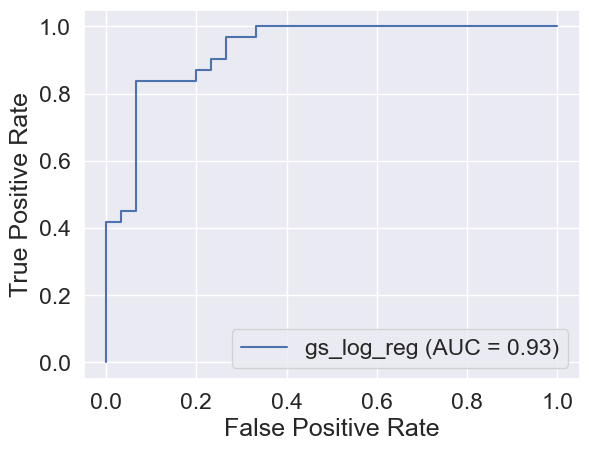

In [66]:
#ROC and AUC (Refer to scikit file and do)
from sklearn.metrics import roc_curve,auc
#Making predictions with probabilities
y_probs=gs_log_reg.predict_proba(x_test)
y_probs_positive=y_probs[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)
roc_auc=auc(fpr,tpr)
a=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name="gs_log_reg")
a.plot()

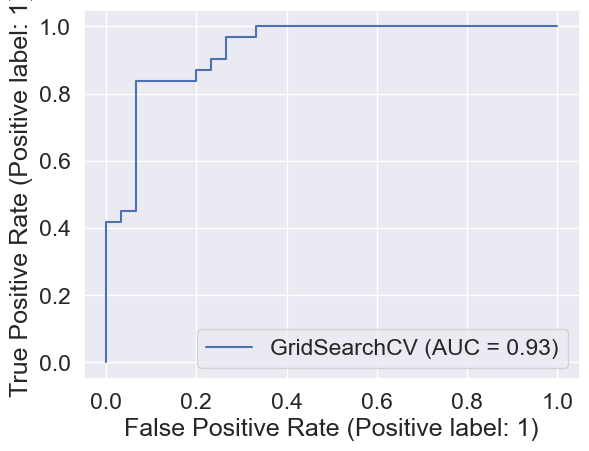

In [57]:
#OR ALTERNATIVE METHOD
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)

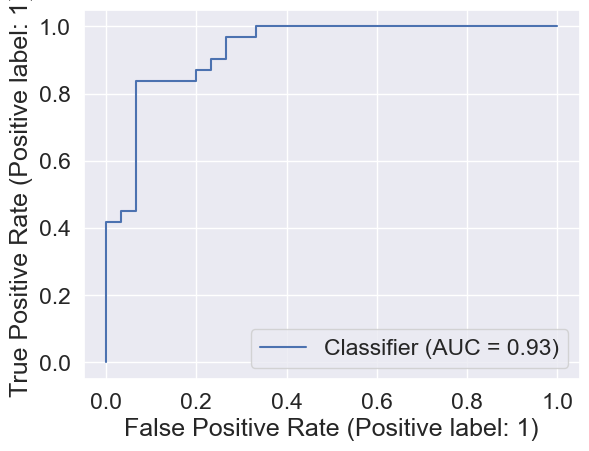

In [71]:
#OR ANOTHER ALTERNATIVE METHOD
y_preds1=gs_log_reg.decision_function(x_test)
RocCurveDisplay.from_predictions(y_test, y_preds1)

In [74]:
print(confusion_matrix(y_test,y_preds))

[[22  8]
 [ 3 28]]


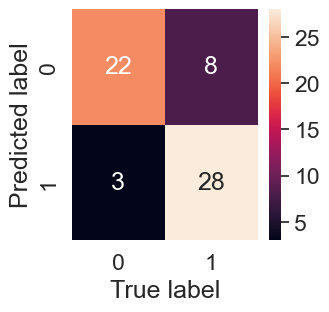

In [75]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test,y_preds):
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test,y_preds)

In [76]:
print(classification_report(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.73      0.88      0.80        25
           1       0.90      0.78      0.84        36

    accuracy                           0.82        61
   macro avg       0.82      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61



In [77]:
# Calculate evaluation metrics using cross-validation
#By using the scoring parameter
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [78]:
#Create a new classifier with best params
model=LogisticRegression(C=0.23357214690901212,solver="liblinear")

In [84]:
#Cross-validated accuracy
cv_acc=cross_val_score(model,x,y,cv=5,scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [80]:
cv_precision=np.mean(cross_val_score(model,x,y,cv=5,scoring="precision"))

In [81]:
cv_recall=np.mean(cross_val_score(model,x,y,cv=5,scoring="recall"))

In [82]:
cv_f1=np.mean(cross_val_score(model,x,y,cv=5,scoring="f1"))

<Axes: title={'center': 'Cross-validated classification metrics'}>

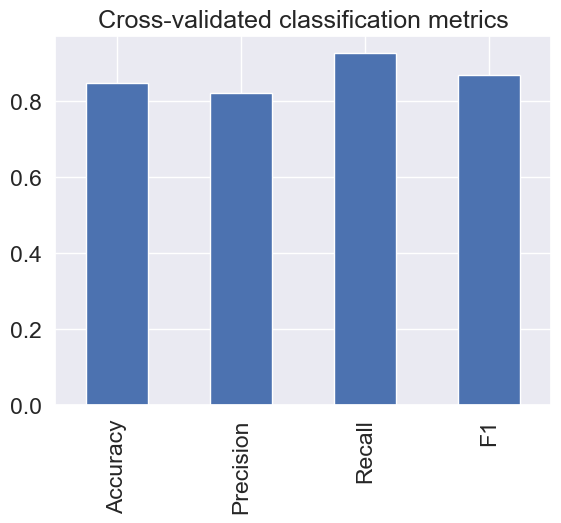

In [83]:
#Visualize cross-validated metrics (REFER)
cv_metrics=pd.DataFrame({"Accuracy":cv_acc,
                          "Precision":cv_precision,
                          "Recall":cv_recall,
                          "F1":cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",legend=False)

### Experimentation:
If you haven't hit your evaluation metric yet...ask yourself..
* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you improve the current models? (Beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?

## Feature Importance

In [138]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [140]:
model=LogisticRegression(C=0.23357214690901212,solver="liblinear")
model.fit(x_train,y_train);

In [141]:
model.coef_

array([[ 0.00816397, -0.98200135,  0.64639144, -0.01412341, -0.00190659,
        -0.15272334,  0.29129554,  0.02829765, -0.6770734 , -0.49352694,
         0.30261515, -0.61606451, -0.671112  ]])

In [143]:
#Match coef's of features to columns
feature_dict=dict(zip(df.columns,list(model.coef_[0])))
feature_dict
#Tells how each attribute is related to target variable

{'age': 0.008163969845769855,
 'sex': -0.9820013534222578,
 'cp': 0.6463914401830658,
 'trestbps': -0.014123406429602378,
 'chol': -0.001906592715247307,
 'fbs': -0.15272333910336147,
 'restecg': 0.29129553752320403,
 'thalach': 0.02829764597004573,
 'exang': -0.6770733998036514,
 'oldpeak': -0.49352694045536577,
 'slope': 0.3026151541816027,
 'ca': -0.6160645111680029,
 'thal': -0.6711119984087851}

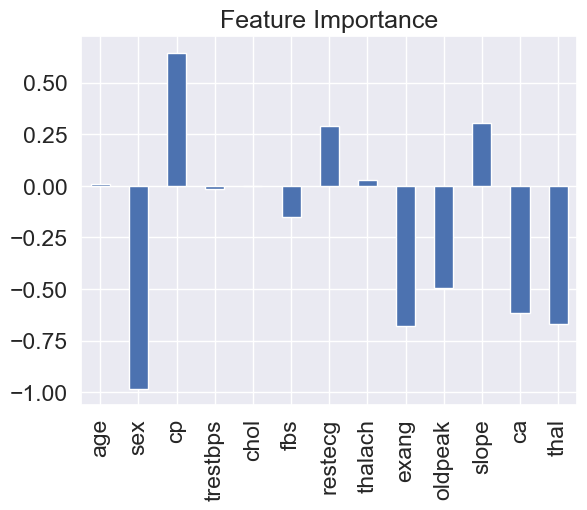

In [144]:
#Visualize
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Importance",legend=False);